## **Centrality Measures using a Reddit Hyperlink Network**

**Submitted by:** Euclides

**Course:** DATA 620

**Data Source: Link:** https://snap.stanford.edu/data/soc-RedditHyperlinks.html

### **Introduction**

The hyperlink network represents the directed connections between two subreddits (a subreddit is a community on Reddit). We also provide subreddit embeddings. The network is extracted from publicly available Reddit data of 2.5 years from Jan 2014 to April 2017.

Subreddit Hyperlink Network: the subreddit-to-subreddit hyperlink network is extracted from the posts that create hyperlinks from one subreddit to another. We say a hyperlink originates from a post in the source community and links to a post in the target community. Each hyperlink is annotated with three properties: the timestamp, the sentiment of the source community post towards the target community post, and the text property vector of the source post. The network is directed, signed, temporal, and attributed. 

### **Load Data and Seperation for Positive and Negative Sentiment**

In [42]:

# Import packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
import itertools

In [43]:
#Load .tsv into a Dataframe
current_dir = os.getcwd()
filename = "soc-redditHyperlinks-body.tsv"
file_path = os.path.join(current_dir, filename)

#imported data with select columns only
df = pd.read_csv(file_path, sep='\t', usecols=[0,1,4])
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,LINK_SENTIMENT
0,leagueoflegends,teamredditteams,1
1,theredlion,soccer,-1
2,inlandempire,bikela,1
3,nfl,cfb,1
4,playmygame,gamedev,1


In [44]:
#Create a subset for positvie sentiment data
df_pos = df[df['LINK_SENTIMENT']==1]
df_pos.head()


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,LINK_SENTIMENT
0,leagueoflegends,teamredditteams,1
2,inlandempire,bikela,1
3,nfl,cfb,1
4,playmygame,gamedev,1
5,dogemarket,dogecoin,1


In [45]:
#Create a subset for negative sentiment data 
df_neg = df[df['LINK_SENTIMENT']==-1]
df_neg.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,LINK_SENTIMENT
1,theredlion,soccer,-1
34,karmaconspiracy,funny,-1
43,badkarma,gamesell,-1
53,casualiama,teenagers,-1
55,australia,sydney,-1


### **Graph Construction**

The networkX package will be used to contruct the graph. Given the large dataset, the graph will be limited to the top 100 nodes for each subset. We will Use Matplotlib with NetworkX to visualize the constructed a network data visualizations. Given that the usernames can be long, the labels within the nodes will be omittied. 

In [46]:
# Convert to NetworkX graph
G_pos = nx.from_pandas_edgelist(df_pos, "SOURCE_SUBREDDIT", "TARGET_SUBREDDIT", edge_attr="LINK_SENTIMENT")
G_neg = nx.from_pandas_edgelist(df_neg, "SOURCE_SUBREDDIT", "TARGET_SUBREDDIT", edge_attr="LINK_SENTIMENT")

print("Positive Sentiment", G_pos)

print("Negative Sentiment", G_neg)


Positive Sentiment Graph with 35010 nodes and 117594 edges
Negative Sentiment Graph with 6370 nodes and 14019 edges


### **Graph Analysis**
The degree centrality of a node is simply its degree—the number of edges it has. The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures.  Given the quantity of nodes and edges in these two graphs we create subgraphs in order to explore the top 10 nodes with the highest degree.  

In [47]:
 deg=nx.degree(G_pos)

 max_deg = max(deg, key=lambda x: x[1])

print("Max degree in positive subset:",max_deg) 


Max degree in positive subset: ('askreddit', 2207)


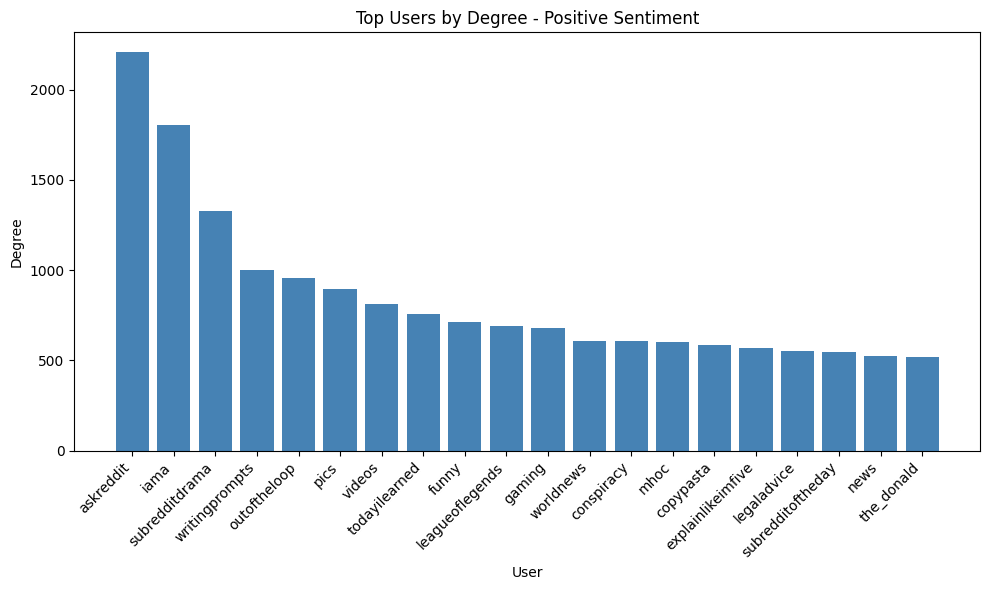

In [48]:
# Sort the list by the second element of each tuple in descending order
sorted_data = sorted(deg, key=lambda x: x[1], reverse=True)

# Extract the top 20 tuples
top_20 = sorted_data[:20]

# Extract labels and values for plotting
labels, values = zip(*top_20)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(labels, values, color='steelblue')

# Add labels and title
plt.xlabel("User")
plt.ylabel("Degree")
plt.title("Top Users by Degree - Positive Sentiment")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout() # To prevent labels from overlapping
plt.show()

In [49]:
 deg=nx.degree(G_neg)

 max_deg = max(deg, key=lambda x: x[1])

print("Max degree in negative subset:",max_deg) 


Max degree in negative subset: ('subredditdrama', 727)


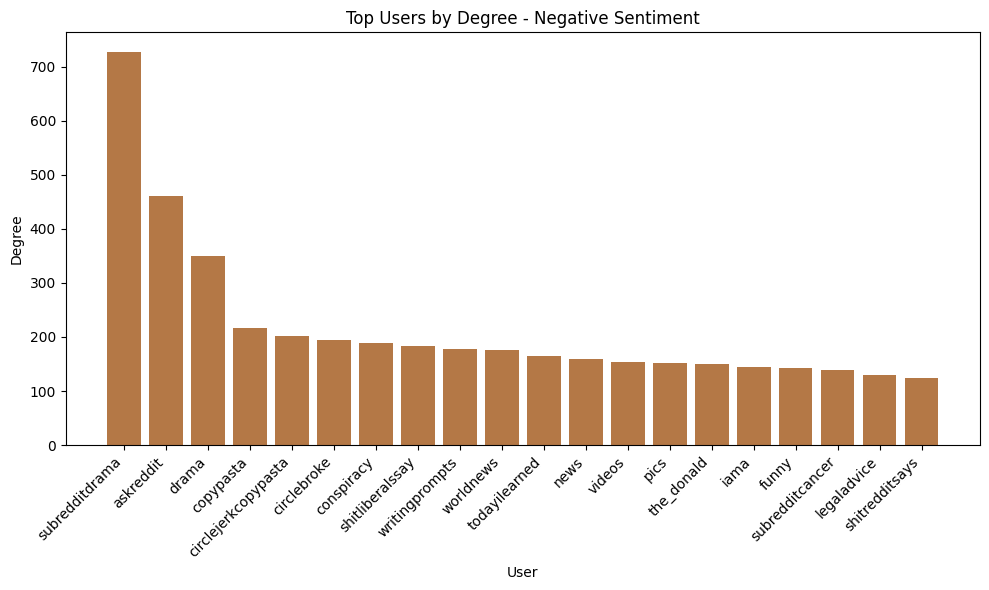

In [50]:
# Sort the list by the second element of each tuple in descending order
sorted_data = sorted(deg, key=lambda x: x[1], reverse=True)

# Extract the top 20 tuples
top_20 = sorted_data[:20]

# Extract labels and values for plotting
labels, values = zip(*top_20)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(labels, values, color='#B47846')

# Add labels and title
plt.xlabel("User")
plt.ylabel("Degree")
plt.title("Top Users by Degree - Negative Sentiment")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout() # To prevent labels from overlapping
plt.show()

 ### **Closeness Centrality**
 Closeness centrality is a network analysis measure that gauges how close a node is to all other nodes in a network, calculated as the inverse of the average shortest path distance from that node to every other node. 

Source: Wikipedia

In [ ]:

# Calculate the degree of each node
node_degree_dict = dict(G_pos.degree())

# Filter nodes with degree >= 10
nodes_with_high_degree = [node for node, degree in node_degree_dict.items() if degree >= 20]

# Create the subgraph with the filtered nodes
H = nx.subgraph(G_pos, nodes_with_high_degree)

#Calculate the closeness centrality 
c = nx.closeness_centrality(H)


In [ ]:
#Sort the dictionary output from the closeness centrality calculation 
cs = dict(sorted(c.items(), key=lambda item: item[1], reverse=True))

#Display the users with the top ten closeness centrality 
dict(itertools.islice(cs.items(), 10))

{'askreddit': 0.6614051758513625,
 'iama': 0.6340084854142428,
 'subredditdrama': 0.617776340456348,
 'outoftheloop': 0.5774260839851,
 'pics': 0.5610003966944954,
 'videos': 0.5608469921561594,
 'todayilearned': 0.5574931911701754,
 'funny': 0.5488406342828673,
 'explainlikeimfive': 0.5478144899345821,
 'copypasta': 0.542310272425985}

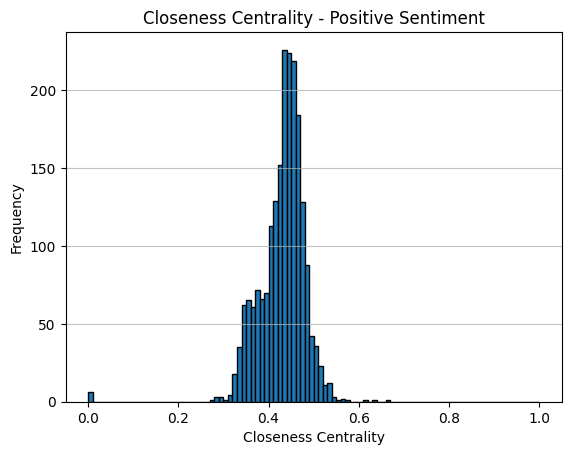

In [ ]:
# Extract the second values 
values = list(c.values())

# Create the histogram
plt.hist(values, bins=100, range=(0, 1), edgecolor='black')  # Adjust bins as needed

# Customize the plot
plt.title('Closeness Centrality - Positive Sentiment')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the histogram
plt.show()

In [ ]:

# Calculate the degree of each node
node_degree_dict = dict(G_neg.degree())

# Filter nodes with degree >= 10
nodes_with_high_degree = [node for node, degree in node_degree_dict.items() if degree >= 20]

# Create the subgraph with the filtered nodes
H = nx.subgraph(G_neg, nodes_with_high_degree)

#Calculate the closeness centrality 
c = nx.closeness_centrality(H)


In [ ]:
#Sort the dictionary output from the closeness centrality calculation 
cs = dict(sorted(c.items(), key=lambda item: item[1], reverse=True))

#Display the users with the top ten closeness centrality 
dict(itertools.islice(cs.items(), 10))

{'subredditdrama': 0.8087248322147651,
 'askreddit': 0.7325227963525835,
 'drama': 0.6478494623655914,
 'circlebroke': 0.6342105263157894,
 'circlejerkcopypasta': 0.617948717948718,
 'copypasta': 0.610126582278481,
 'conspiracy': 0.610126582278481,
 'worldnews': 0.6070528967254408,
 'todayilearned': 0.6055276381909548,
 'news': 0.599502487562189}

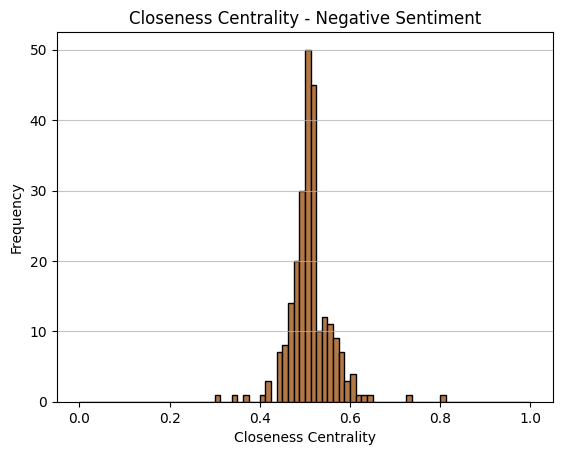

In [ ]:
# Extract the second values 
values = list(c.values())

# Create the histogram
plt.hist(values, bins=80, range=(0, 1), edgecolor='black', color='#B47846')  # Adjust bins as needed

# Customize the plot
plt.title('Closeness Centrality - Negative Sentiment')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the histogram
plt.show()

### **Analysis and Conclusion**
Within this dataset we find that there is significantly more interactions that have positive sentiment.  This is displayed by the first two historgram.  We see the degree for the positive sentiment data is substantially higher.  

For the closeness centrality of the top users by degree we see that both datasets have normal distributions that are slightly skewed.  We see the the positive sentiment has a left skewed distribution, while the negative sentiment data has right skewed distribution.  

With that being said although the overall data set favors positive sentiment we see that the negative sentiment users have a higer closeness centrality.  
